In [1]:
import sys
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 10)

util_path = '/Users/Andrey/IdeaProjects/z2'
if util_path not in sys.path:
    sys.path.append(util_path)

In [2]:
import dlasyd_util.main as m

In [3]:
features = m.load_continuous_features()
data = m.get_data_with_features(features)
data = data.fillna(data.mean())



regression = linear_model.LinearRegression()

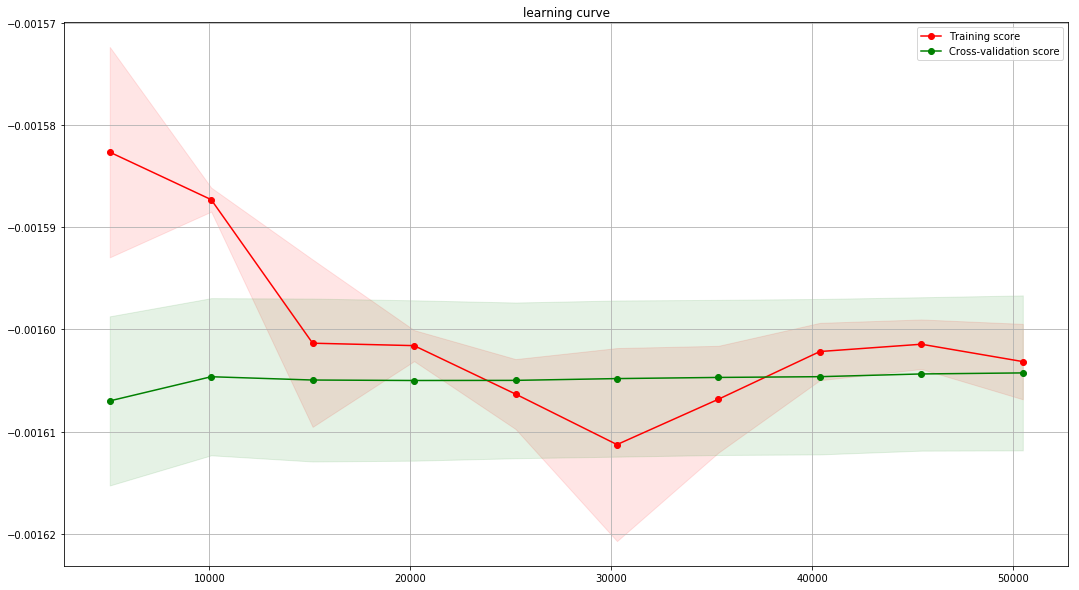

In [85]:
import sklearn.preprocessing as pre
import numpy as np

border = 0.1
newdata = data[(data.logerror < border) & (data.logerror > (border * (-1)))]
 
poly = pre.PolynomialFeatures(1)


for i in range(1):
    newdata = newdata.sample(frac=1).reset_index(drop=True)

    all_X = newdata[features].values
    all_y = newdata['logerror'].values
    all_X_P = poly.fit_transform(all_X, all_y)

    train_sizes2=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]
    train_sizes1=[.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,1.0]

    
    regression = linear_model.LinearRegression(normalize=True)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=regression, X=all_X_P, y=all_y, train_sizes=train_sizes2,
                                                            cv=3, scoring='neg_mean_squared_error')

    m.plot_learning_curve(train_sizes=train_sizes, train_scores=train_scores, test_scores=test_scores, log=False)
    #m.plot_learning_curve(train_sizes=train_sizes, train_scores=train_scores, test_scores=None, log=False)

    
    

0.00160452439475


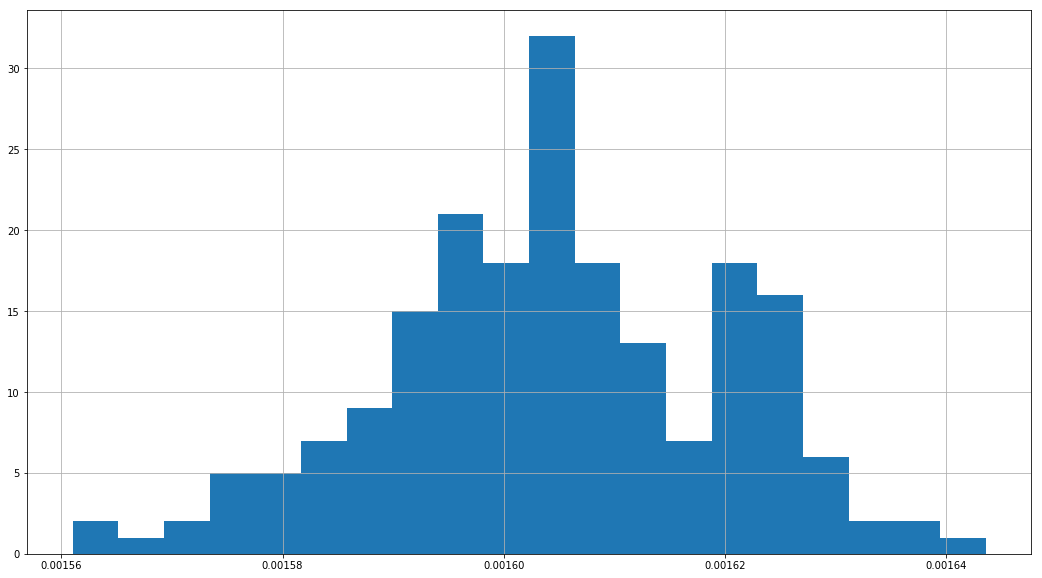

In [82]:
means = []
for i in range (200):
    data = data.sample(frac=1).reset_index(drop=True)
    train = data[:70000]
    train = train[(train.logerror < border) & (train.logerror > (border * (-1)))]

    cv = data[70000:]
    cv = cv[(cv.logerror < border) & (cv.logerror > (border * (-1)))]


    train_X = train[features]
    train_y = train['logerror']

    cv_X = cv[features]
    cv_y = cv['logerror']

    poly = pre.PolynomialFeatures(1)
    train_X_P = poly.fit_transform(train_X)
    cv_X_P = poly.fit_transform(cv_X)

    regression.fit(train_X_P, train_y)
    #regression.predict(cv_X_P)
    means.append(np.mean((regression.predict(cv_X_P) - cv_y) ** 2))
print(np.average(means))

plt.hist(x=means, bins=20)
plt.grid()
plt.show()

0.149618925626


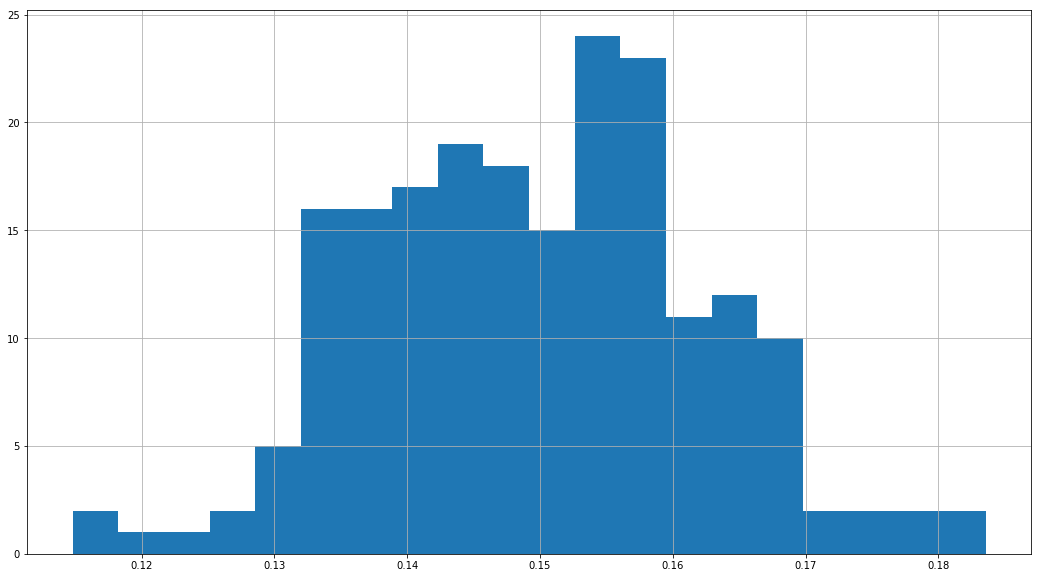

In [79]:
means = []
for i in range (200):
    data = data.sample(frac=1).reset_index(drop=True)
    train = data[:70000]
    train = train[(train.logerror > border) | (train.logerror < (border * (-1)))]

    cv = data[70000:]
    cv = cv[(cv.logerror > border) | (cv.logerror < (border * (-1)))]


    train_X = train[features]
    train_y = train['logerror']

    cv_X = cv[features]
    cv_y = cv['logerror']

    poly = pre.PolynomialFeatures(1)
    train_X_P = poly.fit_transform(train_X)
    cv_X_P = poly.fit_transform(cv_X)

    regression.fit(train_X_P, train_y)
    #regression.predict(cv_X_P)
    means.append(np.mean((regression.predict(cv_X_P) - cv_y) ** 2))
print(np.average(means))

plt.hist(x=means, bins=20)
plt.grid()
plt.show()